In [10]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [11]:
dataset_path = r"C:/Users/owner/Desktop/archive/AMHCD_64/AMHCD_64"

In [12]:
images = []
labels = []

In [13]:
# Parcours des classes
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        for file in os.listdir(class_folder):
            file_path = os.path.join(class_folder, file)
            try:
                # Charger et redimensionner l'image
                img = load_img(file_path, target_size=(64, 64))
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(class_name)
            except Exception as e:
                print(f"⚠️ Erreur avec {file_path}: {e}")

In [14]:
# Conversion en tableaux numpy
images = np.array(images, dtype="float32") / 255.0
labels = np.array(labels)

In [15]:
print("Images:", images.shape)

Images: (25740, 64, 64, 3)


In [16]:
print("Labels:", labels.shape)

Labels: (25740,)


In [17]:
# Encodage des labels
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

In [18]:
# Découpage train/test
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)

In [19]:
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)
print("Nombre de classes:", len(encoder.classes_))

X_train: (20592, 64, 64, 3) X_test: (5148, 64, 64, 3)
y_train: (20592,) y_test: (5148,)
Nombre de classes: 33


In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [21]:
# Nombre de classes
num_classes = len(encoder.classes_)

In [22]:
model = models.Sequential([
    layers.Input(shape=(64, 64, 3)),   # <-- nouvelle ligne
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [23]:
# 📌 Compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# 📌 Entraînement
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 170s 252ms/step - accuracy: 0.6939 - loss: 1.0843 - val_accuracy: 0.9594 - val_loss: 0.1563
Epoch 2/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 149s 231ms/step - accuracy: 0.9371 - loss: 0.2115 - val_accuracy: 0.9784 - val_loss: 0.0823
Epoch 3/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 135s 209ms/step - accuracy: 0.9598 - loss: 0.1325 - val_accuracy: 0.9827 - val_loss: 0.0671
Epoch 4/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 110s 170ms/step - accuracy: 0.9687 - loss: 0.1048 - val_accuracy: 0.9831 - val_loss: 0.0681
Epoch 5/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 74s 115ms/step - accuracy: 0.9721 - loss: 0.0875 - val_accuracy: 0.9850 - val_loss: 0.0543
Epoch 6/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 93s 144ms/step - accuracy: 0.9773 - loss: 0.0779 - val_accuracy: 0.9864 - val_loss: 0.0522
Epoch 7/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 94s 145ms/step - accuracy: 0.9803 - loss: 0.0567 - val_accuracy: 0.9864 - val_loss: 0.0555
Epoch 8/15
644/644 ━━━━━━━━━━━━━━━━━━━━ 73s 114ms/step - accuracy: 0.9829 - los

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("🎯 Accuracy sur le test set:", test_acc)

161/161 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9887 - loss: 0.0544
🎯 Accuracy sur le test set: 0.9887334704399109


In [26]:
import matplotlib.pyplot as plt

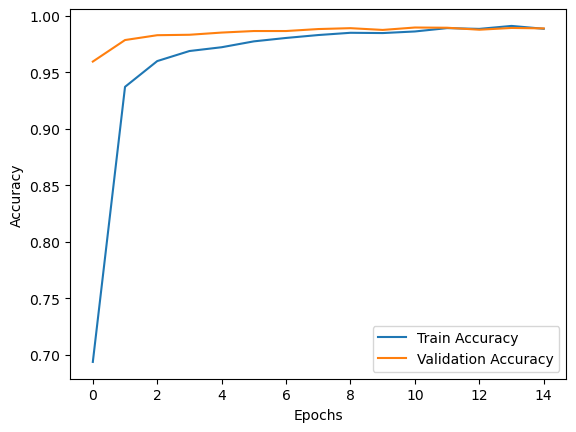

In [27]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

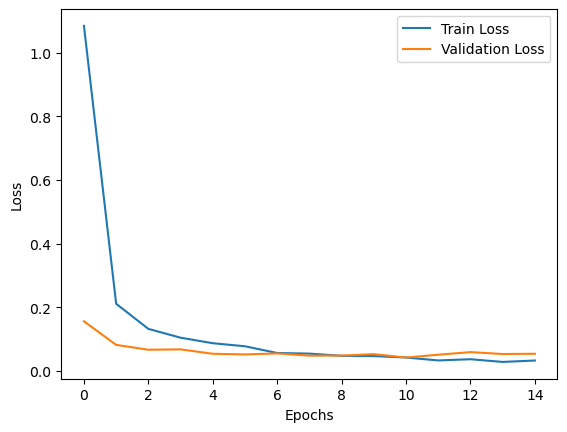

In [28]:
# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [35]:
# 🔮 Prédictions sur X_test
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


In [36]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

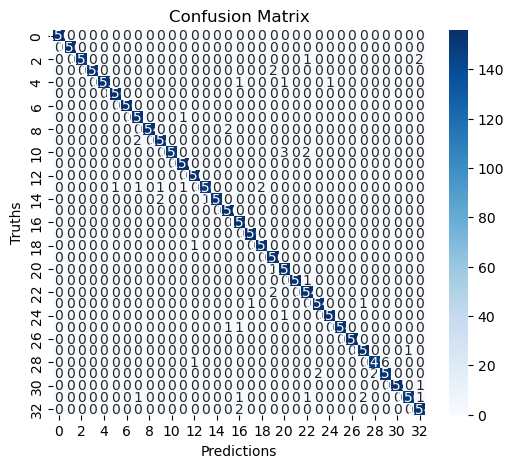

In [38]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  # ✅ affichage des valeurs
plt.title("Confusion Matrix")
plt.xlabel("Predictions")
plt.ylabel("Truths")
plt.show()